# Python data analysis and visualization

### Planetizen Course

Author: [Geoff Boeing](http://geoffboeing.com/)

This course introduces the basics of analyzing and visualizing data in Python, using the pandas, numpy, and matplotlib packages.

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
%matplotlib inline

## Chapter 2: pandas basics

In [2]:
# a python list is a basic data type
li = [1, 2, 3, 4]
li

[1, 2, 3, 4]

In [3]:
# a numpy array is like a list, but faster and more compact
ar = np.array([1, 2, 3, 4])
ar

array([1, 2, 3, 4])

In [4]:
# you can create a numpy array from an existing list too
ar = np.array(li)
ar

array([1, 2, 3, 4])

In [5]:
# a pandas series is based on a numpy array - it's fast, compact, and has more functionality
se1 = pd.Series(li)
se1

0    1
1    2
2    3
3    4
dtype: int64

In [6]:
# you can create a new Series by passing in a list variable or array
# series can contain data types other than just integers
se2 = pd.Series(['a', 'b', 'c', 'd'])
se2

0    a
1    b
2    c
3    d
dtype: object

the first "column" is an index, the second is the series of values

In [7]:
# you can change a series's index
se2.index = ['w', 'x', 'y', 'z']
se2

w    a
x    b
y    c
z    d
dtype: object

In [8]:
# a pandas dataframe is like a table where each column is a series
df = pd.DataFrame([1, 2, 3, 4])
df

,0
0,1
1,2
2,3
3,4


this is a one-dimensional DataFrame... it's equivalent to a Series

In [9]:
# a dict can contain multiple lists and label them
di1 = {'column1':[1, 2, 3, 4], 'column2':[5, 6, 7, 8]}
di1

{'column1': [1, 2, 3, 4], 'column2': [5, 6, 7, 8]}

In [10]:
# a pandas dataframe can contain multiple columns/series
# you can create a dataframe by passing in a list, array, series, or dict
df = pd.DataFrame(di1)
df

,column1,column2
0,1,5
1,2,6
2,3,7
3,4,8


this is a two-dimensional DataFrame. Its index contains row labels (0, 1, 2, 3) and its columns are indexed by column labels

In [11]:
# the row labels in the index are accessed by the .index attribute of the DataFrame object
print(df.index)

# the column labels are accessed by the .columns attribute of the DataFrame object
print(df.columns)

RangeIndex(start=0, stop=4, step=1)
Index(['column1', 'column2'], dtype='object')


In [12]:
# make sure your indices match!
di = {'column1':se1, 'column2':se2}
df = pd.DataFrame(di)
df

,column1,column2
0,1.0,NaN
1,2.0,NaN
2,3.0,NaN
3,4.0,NaN
w,NaN,a
x,NaN,b
y,NaN,c
z,NaN,d


In [13]:
# numpy offers a useful datatype called NaN for null values
x = np.nan
print(x)
print(type(x))

nan
<class 'float'>


## Chapter 3: Working with CSV files

In [14]:
# pandas can load CSV files as DataFrames - it pulls column labels from the first row of the data file
df2 = pd.read_csv('data/pandas-test.csv')

In [15]:
# you can view the first few or the last few rows of a DataFrame with the .head() or .tail() methods
df2.head(3)

,city,state
0,san francisco,california
1,phoenix,arizona
2,seattle,washington


In [16]:
# returns 5 rows by default, or you can pass the number of rows you want as an argument
df2.tail()

,city,state
3,dallas,texas
4,denver,colorado
5,chicago,illinois
6,portland,oregon
7,miami,florida


In [17]:
# you can add a new column to a DataFrame
df2['country'] = ''
df2

,city,state,country
0,san francisco,california,
1,phoenix,arizona,
2,seattle,washington,
3,dallas,texas,
4,denver,colorado,
5,chicago,illinois,
6,portland,oregon,
7,miami,florida,


In [18]:
# you can update the values of an entire column
df2['country'] = 'USA'
df2

,city,state,country
0,san francisco,california,USA
1,phoenix,arizona,USA
2,seattle,washington,USA
3,dallas,texas,USA
4,denver,colorado,USA
5,chicago,illinois,USA
6,portland,oregon,USA
7,miami,florida,USA


In [19]:
# you can set the values of a column (aka, Series) in the DataFrame to a list of values
df2['country'] = ['USA', 'United States'] * 4
df2

,city,state,country
0,san francisco,california,USA
1,phoenix,arizona,United States
2,seattle,washington,USA
3,dallas,texas,United States
4,denver,colorado,USA
5,chicago,illinois,United States
6,portland,oregon,USA
7,miami,florida,United States


In [20]:
# you can use fast vectorized methods on a pandas series (aka, a column in our dataframe)
df2['country'].str.replace('United States', 'USA')
df2

,city,state,country
0,san francisco,california,USA
1,phoenix,arizona,United States
2,seattle,washington,USA
3,dallas,texas,United States
4,denver,colorado,USA
5,chicago,illinois,United States
6,portland,oregon,USA
7,miami,florida,United States


that didn't do anything to our dataframebecause .str.replace() returns the updated version - it doesn't perform the operation in place

In [21]:
# we need to capture the updated values when they get returned
df2['country'] = df2['country'].str.replace('United States', 'USA')
df2

,city,state,country
0,san francisco,california,USA
1,phoenix,arizona,USA
2,seattle,washington,USA
3,dallas,texas,USA
4,denver,colorado,USA
5,chicago,illinois,USA
6,portland,oregon,USA
7,miami,florida,USA


In [22]:
# you can change the column names
df2.columns = ['city_name', 'state_name', 'nation']
df2

,city_name,state_name,nation
0,san francisco,california,USA
1,phoenix,arizona,USA
2,seattle,washington,USA
3,dallas,texas,USA
4,denver,colorado,USA
5,chicago,illinois,USA
6,portland,oregon,USA
7,miami,florida,USA


In [23]:
# you can save your DataFrame as a csv file
df2.to_csv('data/my_data.csv')

## Chapter 4: Dropping and editing values

In [24]:
# there are lots of ways to create dataframes
list_of_tuples = [('sf', 2012), ('phx', np.nan), ('phx', 2005), ('chi', 2009)]
df = pd.DataFrame(list_of_tuples, columns=['city', 'year'])
df['country'] = 'USA'
df['continent'] = 'North America'
df

,city,year,country,continent
0,sf,2012.0,USA,North America
1,phx,NaN,USA,North America
2,phx,2005.0,USA,North America
3,chi,2009.0,USA,North America


In [25]:
# you can remove a column from a dataframe with the .drop() method by referencing its label and axis
# axis 0 = rows
# axis 1 = columns
df2 = df.drop('country', axis=1, inplace=False)
df2

,city,year,continent
0,sf,2012.0,North America
1,phx,NaN,North America
2,phx,2005.0,North America
3,chi,2009.0,North America


In [26]:
# you can use the len() function to check the row count of a DataFrame
len(df2)

4

In [27]:
# you can also use .count() method to check the row count, but this excludes NaNs
df2.count()

city         4
year         3
continent    4
dtype: int64

In [28]:
# or you can use the .shape attribute to get the shape of the DataFrame
df2.shape

(4, 3)

An attribute is different than a method or a function. Notice it doesn't use parentheses like .shape()

In [29]:
# you can get a count of values that appear in some column
df2['city'].value_counts()

phx    2
chi    1
sf     1
Name: city, dtype: int64

In [30]:
# you can drop rows that contain duplicate values in some specified column
df3 = df2.drop_duplicates('city')
df3

,city,year,continent
0,sf,2012.0,North America
1,phx,NaN,North America
3,chi,2009.0,North America


look at the index above. remember that it's not a row counter, it's an index of row labels

In [31]:
# back to our earlier dataframe
df

,city,year,country,continent
0,sf,2012.0,USA,North America
1,phx,NaN,USA,North America
2,phx,2005.0,USA,North America
3,chi,2009.0,USA,North America


In [32]:
# you can perform operations across an entire Series (aka column in our DataFrame) at once
df['year5'] = df['year'] + 5
df

,city,year,country,continent,year5
0,sf,2012.0,USA,North America,2017.0
1,phx,NaN,USA,North America,NaN
2,phx,2005.0,USA,North America,2010.0
3,chi,2009.0,USA,North America,2014.0


In [33]:
df = df.dropna()
df

,city,year,country,continent,year5
0,sf,2012.0,USA,North America,2017.0
2,phx,2005.0,USA,North America,2010.0
3,chi,2009.0,USA,North America,2014.0


In [34]:
df['year'].min()

2005.0

In [35]:
df['year'].max()

2012.0

In [36]:
df['year'].mean()

2008.6666666666667

In [37]:
df['year'].median()

2009.0

In [38]:
df['year'].sum()

6026.0

In [39]:
df['year'].std()

3.5118845842842465

In [40]:
df['year'].describe()

count       3.000000
mean     2008.666667
std         3.511885
min      2005.000000
25%      2007.000000
50%      2009.000000
75%      2010.500000
max      2012.000000
Name: year, dtype: float64

## Chapter 5: Selecting and slicing data

In [41]:
# Operation                       Syntax         Result
#----------------------------------------------------------
# Select column                   df[col]        Series
# Select row by label             df.loc[label]  Series
# Select row by integer location  df.iloc[loc]   Series
# Slice rows                      df[5:10]       DataFrame
# Select rows by boolean vector   df[bool_vec]   DataFrame

In [42]:
# create a pandas dataframe from the location data set
df = pd.read_csv('data/gps-coords.csv')
df.head()

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
1,51.474005,-0.450999,05/14/2014 09:22,Hounslow,United Kingdom
2,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
3,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom
4,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom


In [43]:
# get a column from the dataframe by its label with [] indexing - returns column as a pandas series with the dataframe's index
df['city'].head()

0    West Drayton
1        Hounslow
2        Hounslow
3        Hounslow
4        Hounslow
Name: city, dtype: object

In [44]:
# get multiple columns by their labels by passing a list of column names within the [] operator - returns a dataframe
li = ['city', 'country']
df[li].head()

,city,country
0,West Drayton,United Kingdom
1,Hounslow,United Kingdom
2,Hounslow,United Kingdom
3,Hounslow,United Kingdom
4,Hounslow,United Kingdom


In [45]:
# get a value using the [] operator for a column label then a row label
df['city'][0]

'West Drayton'

In [46]:
# use .loc to select by row label - returns the row as a series whose index is the dataframe column labels
df.loc[0]

lat                 51.4813
lon               -0.451011
date       05/14/2014 09:07
city           West Drayton
country      United Kingdom
Name: 0, dtype: object

In [47]:
# use .loc to select by row label and column label
df.loc[0, 'country']

'United Kingdom'

In [48]:
# 0:3 is a slice of rows with label 0 to label 3
# ['city', 'date'] is a list of column labels
df.loc[0:3, ['city', 'date']]

,city,date
0,West Drayton,05/14/2014 09:07
1,Hounslow,05/14/2014 09:22
2,Hounslow,05/14/2014 10:51
3,Hounslow,05/14/2014 11:24


In [49]:
# slice by rows and columns
df.loc[0:3, 'date':'country']

,date,city,country
0,05/14/2014 09:07,West Drayton,United Kingdom
1,05/14/2014 09:22,Hounslow,United Kingdom
2,05/14/2014 10:51,Hounslow,United Kingdom
3,05/14/2014 11:24,Hounslow,United Kingdom


In [50]:
# you can set values with .loc as well
print(df.loc[0, 'city'])
df.loc[0, 'city'] = 'London'
print(df.loc[0, 'city'])

West Drayton
London


In [51]:
# use .iloc for integer position based indexing
# get the value from the row in position 3 and the column in position 2
df.iloc[3, 2]

'05/14/2014 11:24'

In [52]:
df.head()

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,London,United Kingdom
1,51.474005,-0.450999,05/14/2014 09:22,Hounslow,United Kingdom
2,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
3,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom
4,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom


In [53]:
# you can use .iloc with slices too
# slice rows from position 112 to 115 and columns from position 2 to 4
# iloc is not inclusive, so for example "from 2 to 4" will return positions 2 and 3 (but not 4)
df.iloc[112:115, 2:4]

,date,city
112,05/16/2014 07:03,Lisbon
113,05/16/2014 07:33,Lisbon
114,05/16/2014 08:03,Lisbon


In [54]:
# you can use iloc to select every nth row from a data set
n = 300
df.iloc[range(0, len(df), n)]

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,London,United Kingdom
300,41.377091,2.151175,05/20/2014 03:18,Barcelona,Spain
600,50.052338,19.946220,05/31/2014 21:10,Krakow,Poland
900,48.561181,9.059672,06/09/2014 15:12,Tübingen,Germany
1200,41.378301,2.187443,06/17/2014 16:37,Barcelona,Spain
1500,42.208201,20.735993,06/30/2014 08:27,Prizren,Kosovo


In [55]:
# it's easier to tell the difference between .loc and .iloc if the index labels aren't the same as their positions
df.index = [label**2 for label in df.index]
df.head()

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,London,United Kingdom
1,51.474005,-0.450999,05/14/2014 09:22,Hounslow,United Kingdom
4,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
9,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom
16,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom


In [56]:
# this returns the rows with labels between 4 and 9 (.loc is inclusive)
df.loc[4:9]

,lat,lon,date,city,country
4,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
9,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom


In [57]:
# this returns rows with labels in positions 4 through 8 (not through 9, because .iloc is not inclusive)
df.iloc[4:9]

,lat,lon,date,city,country
16,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom
25,51.480146,-0.441103,05/14/2014 12:23,Hounslow,United Kingdom
36,51.479669,-0.441024,05/14/2014 12:38,Hounslow,United Kingdom
49,38.781775,-9.137544,05/14/2014 15:11,Lisbon,Portugal
64,38.774422,-9.129195,05/14/2014 15:25,Lisbon,Portugal


### Select data by value

In [58]:
# load a reduced set of gps data
df = pd.read_csv('data/gps-coords-reduced.csv')
df.tail()

,lat,lon,date,city,country
173,41.044556,28.983286,07/08/2014 16:44,Istanbul,Turkey
174,41.008992,28.968268,07/08/2014 20:03,Istanbul,Turkey
175,41.043487,28.985488,07/08/2014 22:18,Istanbul,Turkey
176,40.977637,28.823879,07/09/2014 09:03,Istanbul,Turkey
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany


In [59]:
# create a Series of true/false, indicating if each row in the column is equal to some value
df['city']=='Munich'

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177     True
Name: city, Length: 178, dtype: bool

In [60]:
# now, select only those rows in the df that match that condition
df[df['city']=='Munich']

,lat,lon,date,city,country
177,48.35711,11.791346,07/09/2014 13:20,Munich,Germany


In [61]:
# pandas logical operators are: | for or, & for and, ~ for not
# these must be grouped by using parentheses
# what cities were visited in spain that were not barcelona?
not_bcn = df[(df['country']=='Spain') & ~(df['city']=='Barcelona')]
not_bcn

,lat,lon,date,city,country
24,41.303911,2.105931,05/18/2014 22:35,El Prat de Llobregat,Spain
25,41.289946,2.064590,05/18/2014 23:04,Viladecans,Spain
126,41.306752,2.097624,06/12/2014 17:19,El Prat de Llobregat,Spain
127,41.304333,2.072728,06/12/2014 17:49,El Prat de Llobregat,Spain
131,41.358460,2.128701,06/13/2014 11:35,Hospitalet de Llobregat,Spain
138,41.294761,2.059722,06/20/2014 22:15,Viladecans,Spain


In [62]:
not_bcn['city'].unique()

array(['El Prat de Llobregat', 'Viladecans', 'Hospitalet de Llobregat'],
      dtype=object)

In [63]:
# select rows where either the city is munich, or the country is serbia
df[(df['city']=='Munich') | (df['country']=='Serbia')]

,lat,lon,date,city,country
139,44.821164,20.289821,06/21/2014 01:59,Belgrade,Serbia
140,44.820414,20.463465,06/21/2014 18:44,Belgrade,Serbia
141,44.761583,19.577904,06/22/2014 07:58,Slepčević,Serbia
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany


In [64]:
# how many observations are west of the prime meridian?
len(df[df['lon'] < 0])

24

In [65]:
len(df[df['lon'] < 0])

24

In [66]:
# get all rows that contain a city that starts with the letter G
row_mask = df['city'].str.startswith('G')
df[row_mask]

,lat,lon,date,city,country
62,50.273632,18.729429,06/02/2014 06:39,Gliwice,Poland
114,48.282940,8.199630,06/10/2014 13:33,Gutach,Germany
115,48.389029,8.021342,06/10/2014 13:48,Gengenbach,Germany
152,40.187825,20.079303,07/04/2014 17:42,Gjirokastër,Albania


In [67]:
# select all rows with certain city names by using .isin([list])
row_mask = df['city'].isin(['Munich', 'Berat', 'Maia', 'Sarajevo'])
df[row_mask]

,lat,lon,date,city,country
23,41.237205,-8.672173,05/18/2014 19:55,Maia,Portugal
142,43.859459,18.425962,06/22/2014 21:12,Sarajevo,Bosnia and Herzegovina
143,43.858562,18.397478,06/23/2014 14:12,Sarajevo,Bosnia and Herzegovina
151,40.702184,19.946288,07/04/2014 08:14,Berat,Albania
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany


### How to select based on a date-time values

In [68]:
# load the location data set, indexed by the date field
# and, parse the dates so they're no longer strings but now rather Python datetime objects
# this lets us do date and time based operations on the data set
dt = pd.read_csv('data/gps-coords.csv', index_col='date', parse_dates=True)
dt.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [69]:
len(dt)

1759

In [70]:
# 1759 rows - but is the timestamp index unique?
dt.index.is_unique

False

In [71]:
# the index is not unique - drop duplicates
dt.drop_duplicates(inplace=True)
len(dt)

1750

In [72]:
# the .weekday attribute determines which day of the week a date is
# 0 is monday and 6 is sunday, Tue-Sat are 1-5
# what day of the week is each datetime in our dataframe's index?
str(list(dt.index.weekday))

'[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [73]:
# use bitwise OR to create a boolean vector of which rows are a weekend date
weekend_mask = (dt.index.weekday==5) | (dt.index.weekday==6)
weekend_mask

array([False, False, False, ..., False, False, False])

In [74]:
weekends = dt[weekend_mask]
weekdays = dt[~weekend_mask]

In [75]:
hourly_share = pd.DataFrame()

# calculate what share of the weekday observations each hour has
weekday_hourly = weekdays.groupby(weekdays.index.hour).size()
hourly_share['weekday'] = weekday_hourly / weekday_hourly.sum()

# calculate what share of the weekend observations each hour has
weekend_hourly = weekends.groupby(weekends.index.hour).size()
hourly_share['weekend'] = weekend_hourly / weekend_hourly.sum()

# format the x-axis ticks like 0:00 times and plot the data
hourly_share.index = [s + ':00' for s in hourly_share.index.astype(str)]
hourly_share

,weekday,weekend
0:00,0.019370,0.031311
1:00,0.016142,0.035225
2:00,0.017756,0.029354
3:00,0.020178,0.033268
4:00,0.013721,0.011742
5:00,0.020985,0.033268
6:00,0.030670,0.029354
7:00,0.029056,0.041096
8:00,0.044391,0.029354
9:00,0.044391,0.033268


## Chapter 6: visualization

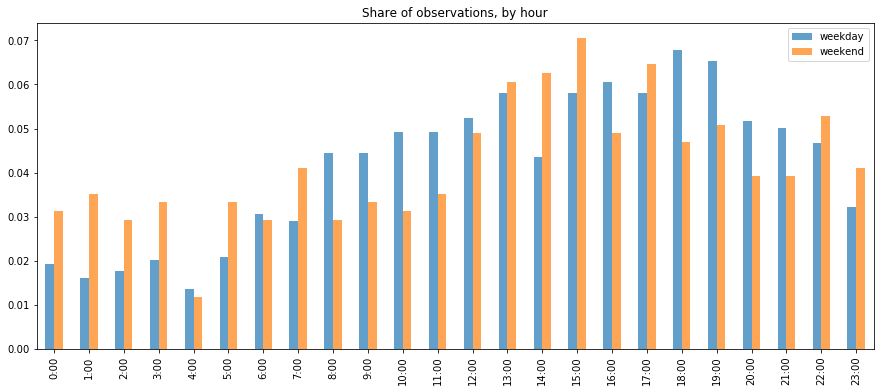

In [76]:
ax = hourly_share.plot(figsize=[15, 6], kind='bar', alpha=0.7, title='Share of observations, by hour')

In [77]:
# calculate and plot the number of observations each day of the week has
daily_count = dt.groupby(dt.index.weekday).size()
daily_count.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_count

Monday       262
Tuesday      253
Wednesday    251
Thursday     256
Friday       217
Saturday     267
Sunday       244
dtype: int64

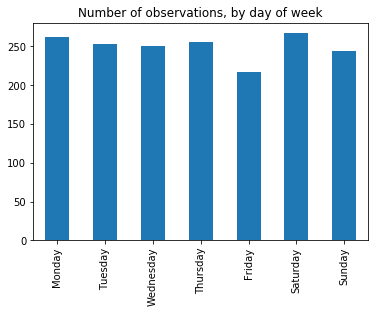

In [78]:
ax = daily_count.plot(kind='bar', title='Number of observations, by day of week')

In [79]:
# get the count of records by date
countdata = dt.groupby(dt.index.date).size()
countdata.head()

2014-05-14    35
2014-05-15    61
2014-05-16    57
2014-05-17    63
2014-05-18    49
dtype: int64

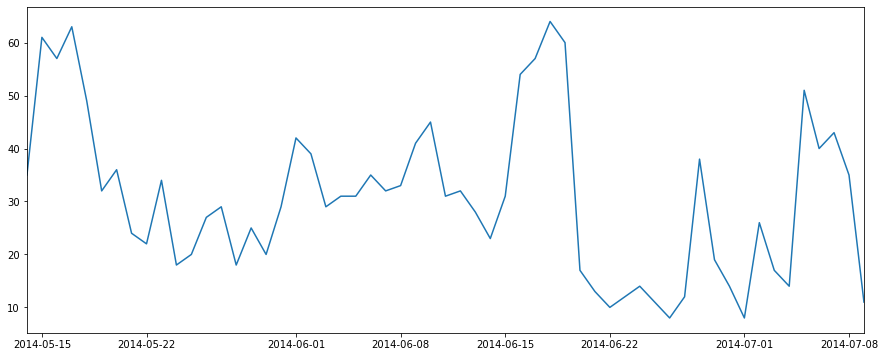

In [80]:
ax = countdata.plot(kind='line', figsize=[15, 6])

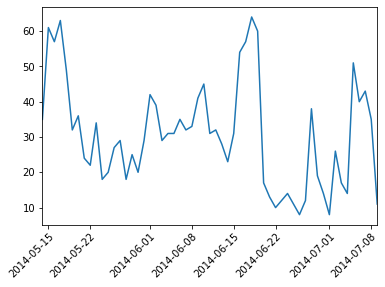

In [81]:
# simple matplotlib line chart
ax = countdata.plot(kind='line')
plt.xticks(rotation=45, rotation_mode='anchor', ha='right')
plt.show()

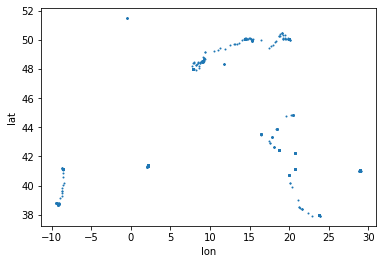

In [82]:
df = pd.read_csv('data/gps-coords.csv')
ax = df.plot(kind='scatter', x='lon', y='lat', s=1)

In [83]:
countries = df['country'].value_counts()
countries

Spain                     646
Portugal                  256
Germany                   225
Czech Republic            130
Poland                    104
Turkey                     94
Greece                     82
Montenegro                 51
Macedonia (FYROM)          34
Kosovo                     30
Croatia                    30
Albania                    29
Bosnia and Herzegovina     26
Serbia                     15
United Kingdom              7
Name: country, dtype: int64

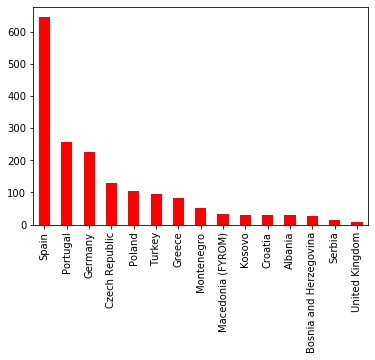

In [84]:
ax = countries.plot(kind='bar', color='r')